# Logistic Regression

- Classification Algorithm that tries to learn a function that approximates P(Y|X)
- Assumption: P(Y|X) can be approximated to a sigmoid function applied to a linear combination of input variables (Theta*X)
- Given the best values for Theta, Logistic regression can do a great job estimating the probability of different classes 

## Model Development

#### Step 1: Develop the Hypothesis

The hypothesis is nothing but the implementation of the sigmoid function. Since the Cost function has a term log(1-h) and log(0) is not defined, a very small term is deducted to avoid error. 

In [1]:
import pandas as pd
import numpy as np

In [11]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

#### Step 2: Determine the Cost Function

- We cannot use Linear Regression Cost Function as it will not converge to global minima
- The hypothesis (h) is just a probability (binomial) 
- Probability Mass Function (PMF) is P(Y=y | X=x) = p^y + (1-p)^(1-y) where p=probability of success (here, heart disease)
- The Log Likelihood equation (Cost Function) for the Logistic Regression is given below

In [12]:
def cost(X, y, theta):
    h = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

#### Step 3: Update the Theta values

- There is no closed form solution for finding the Maximum Likelihood
- We need to find optimum Theta values that maximizes the Log Likelihood using Optimization technique
- We are going to use Gradient Descent Algorithm
- The partial derivate (gradient) of Log Likelihood with respect to Theta is np.sum((h - y)x_j) where j=number of features
- So, the equation for Gradient Descent becomes Theta = Theta - alpha * gradient where alpha = learning rate


In [15]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for j in range(0, len(X.columns)):
            theta[j] -= (alpha/m) * np.sum((h-y)*X.iloc[:, j])
        J.append(cost(X, y, theta))
    return J, theta

#### Step 4: Calculate the Final Prediction and Accuracy

In [14]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

## Example Problem

Can we predict whether a patient will have heart disease or not using patient clinical history? 
 - Why? May be predicting heart disease early with minor symptoms might save a life.
 - Column 'AHD' = Yes or No (Binary Classification) 
 - Final algorithm Output: 1 if it predicts Heart Disease, 0 for No Heart Disease  

**Dataset:** Kaggle's Heart Disease

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### Data Pre-Processing

In [5]:
df = df.dropna()

In [6]:
df["ChestPainx"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thalx"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [7]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)
df.head()

,00,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPainx,Thalx
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,1,1
1,1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,2,2
2,1,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,2,3
3,1,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,3,2
4,1,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,4,2


In [17]:
y= df["AHD"]
X = df.drop(columns=["ChestPain", "Thal", "AHD"])
X.head()

,00,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPainx,Thalx
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,1,1
1,1,67,1,160,286,0,2,108,1,1.5,2,3.0,2,2
2,1,67,1,120,229,0,2,129,1,2.6,2,2.0,2,3
3,1,37,1,130,250,0,0,187,0,3.5,3,0.0,3,2
4,1,41,0,130,204,0,2,172,0,1.4,1,0.0,4,2


### Model Building

The steps are 
- Initialize Theta values (i took 0.5), learning rate = alpha = 0.0001, Epochs = 25000
- Include the bias column
- Predict the result (1 = Heart Disease, 0 = No Heart Disease)
   - Use Gradient Descent to find optimal Theta that maximizes Log Likelihood
   - Calculate the probability (p) values
   - Here, I use a threshold of 0.5 to classify 1 or 0 for the output
- Calculate performance metric (here, I use Accuracy)

In [18]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)
acc

C:\Users\pbagavan\AppData\Local\Temp/ipykernel_55316/1589533411.py:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))


0.7946127946127947

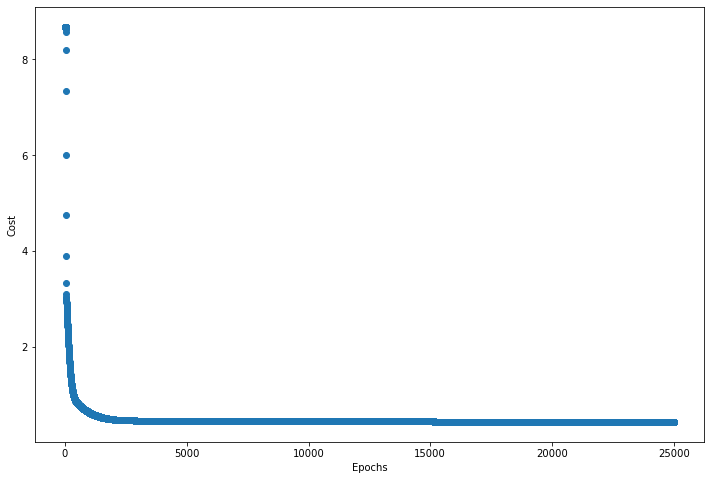

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()